In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.features import Feature, FeatureLayer, FeatureSet, GeoAccessor, GeoSeriesAccessor
from arcgis.features import SpatialDataFrame
from arcgis.geometry import Geometry, Point
from arcgis.geometry.functions import buffer
from arcgis.network import RouteLayer

In [63]:
gis = GIS(token="Q9Mcol322D06gnBGtI386v-xLNThWcIpaWwH_gX_LfKZ4vLH4pPZFVrjzbWZgbJjUuDO5jbfbD4tqKOMU-yLvzJ92EISiTH3hGsHPBm_gXd2tsVttHrEQVcUdhJbqRhVBDC6SX7IwJXXB-cdROxAijeirQ42kuFY7oCYkidYv8B9rJ4x6a8KsK_BEBf_N5WTVLV9PMqzxU5g3rmte6u6M2IvcuK2r_Aub9reH2Ahx6I.")

# Painting a map of colombia, and of the park house (Google maps coordinates)

In [4]:
m2 = GIS().map('Bogotá, Colombia')
m2.basemap='streets'
m2

MapView(layout=Layout(height='400px', width='100%'))

In [5]:
#house_df = []
records = []
desc = "Mi casa"
lat = 4.740548 
long = -74.046539
records.append((desc,lat,long))
records
    

[('Mi casa', 4.740548, -74.046539)]

In [6]:
import pandas as pd
house_df =pd.DataFrame(records, columns=['descripcion', 'latutud', 'longitud'])
house_df.head()

,descripcion,latutud,longitud
0,Mi casa,4.740548,-74.046539


In [8]:
house_sdf = pd.DataFrame.spatial.from_xy(house_df, 'longitud', 'latutud')


In [9]:
house_sdf.head()

,descripcion,latutud,longitud,SHAPE
0,Mi casa,4.740548,-74.046539,"{""x"": -74.046539, ""y"": 4.740548, ""spatialRefer..."


In [10]:
house_sdf.spatial.plot(map_widget= m2)

True

# Cool things I've learnt today:

* Google maps uses the same coordinate system as Esri's default, so no need to worry about it.

* The spatial data frame creator receives the geo data as follows: pd.DataFrame(records, columns=['descripcion', 'latitud', 'longitud'])

* The data from google maps comes first latitud, then longitud. Ex: The park where i used to take my dog out is at <4.740548, -74.046539>.

* Geographical plotting differs from the normal way of plotting in matematics in the sens that the y parameter is plotted first, then the x. This is for exemple why in degrees coordinates as represented as: 4°44'26.0"NORTH 74°02'47.5"WEST

-> I think i Know enough now to do an study of the best times to go from home to work in car at different times. Maybe


# Plotting my office building

In [11]:
house_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/Shapes/RedStarLargeB.png","contentType":"image/png","width":24,"height":24}
grocery_symbol = symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Shopping.png","contentType":"image/png","width":12,"height":12}
hospital_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/SafetyHealth/Hospital.png","contentType":"image/png","width":24,"height":24}
coffee_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Coffee.png","contentType":"image/png","width":12,"height":12}
restaurant_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Dining.png","contentType":"image/png","width":12,"height":12}
bar_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Bar.png","contentType":"image/png","width":12,"height":12}
gas_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/Transportation/esriBusinessMarker_72.png","contentType":"image/png","width":12,"height":12}
shops_service_symbol={"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/esriBusinessMarker_58_Red.png","contentType":"image/png","width":10,"height":10}
transport_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/Transportation/esriDefaultMarker_195_White.png","contentType":"image/png","width":15,"height":15}
professional_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/esriBusinessMarker_64_Yellow.png","contentType":"image/png","width":10,"height":10}
parks_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/OutdoorRecreation/RestArea.png","contentType":"image/png","width":10,"height":10}
education_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/Note.png","contentType":"image/png","width":10,"height":10}
arts_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/PeoplePlaces/LiveShow.png","contentType":"image/png","width":12,"height":12}
destination_symbol = {"angle":0,"xoffset":0,"yoffset":12,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/Basic/RedStickpin.png","contentType":"image/png","width":24,"height":24}
fill_symbol = {"type": "esriSFS","style": "esriSFSNull",
               "outline":{"color": [255,0,0,255]}}

fill_symbol2 = {"type": "esriSFS","style": "esriSFSNull",
               "outline":{"color": [0,0,0,255]}}

route_symbol = {"type": "esriSLS","style": "esriSLSSolid",
                "color": [0, 120, 255, 255],"width": 1.5}

In [13]:
paddress = "CARRERA 21A # 159A-42" + ", " + "BOGOTA" + ", " + "COLOMBIA"
prop_geom_fset = geocode(paddress, as_featureset=True)

In [18]:
prop_geom = prop_geom_fset.features[0]
prop_geom.geometry

AttributeError: 'NoneType' object has no attribute 'extent'

{'x': -74.04648543698433,
 'y': 4.740342726614363,
 'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}

In [19]:
from arcgis.geometry.functions import buffer
prop_geom = prop_geom_fset.features[0]
prop_buffer = buffer([prop_geom.geometry], 
                     in_sr = 102100, buffer_sr=102100,
                     distances=0.05, unit=9001)[0]

prop_buffer_f = Feature(geometry=prop_buffer)
prop_buffer_fset = FeatureSet([prop_buffer_f])

In [20]:
pdx_map = gis.map('Bogota, COLOMBIA')
pdx_map.basemap='gray'
pdx_map

MapView(layout=Layout(height='400px', width='100%'))

In [21]:
pdx_map.draw(prop_buffer_fset, symbol=fill_symbol2)
pdx_map.draw(prop_geom_fset, symbol=house_symbol)

In [22]:
neighborhood_data_dict = {}

In [23]:
groceries = geocode('groceries', search_extent=prop_buffer.extent, 
                    max_locations=20, as_featureset=True)
neighborhood_data_dict['groceries'] = []

for place in groceries:
    popup={"title" : place.attributes['PlaceName'], 
    "content" : place.attributes['Place_addr']}
    pdx_map.draw(place.geometry, symbol=grocery_symbol, popup=popup)
    neighborhood_data_dict['groceries'].append(place.attributes['PlaceName'])

In [24]:
pdx_map2 = gis.map('BOGOTA, COLOMBIA')
pdx_map2.basemap='gray'
pdx_map2

MapView(layout=Layout(height='400px', width='100%'))

In [25]:
pdx_map2.draw(prop_buffer_fset, symbol=fill_symbol2)
pdx_map2.draw(prop_geom_fset, symbol=house_symbol)

In [26]:
restaurants = geocode('restaurant', search_extent=prop_buffer.extent, max_locations=200)
neighborhood_data_dict['restauruants'] = []

for place in restaurants:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=restaurant_symbol, popup=popup)
    neighborhood_data_dict['restauruants'].append(place['attributes']['PlaceName'])

In [27]:
hospitals = geocode('hospital', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['hospitals'] = []

for place in hospitals:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=hospital_symbol, popup=popup)
    neighborhood_data_dict['hospitals'].append(place['attributes']['PlaceName'])

In [28]:
coffees = geocode('coffee', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['coffees'] = []

for place in coffees:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=coffee_symbol, popup=popup)
    neighborhood_data_dict['coffees'].append(place['attributes']['PlaceName'])

In [29]:
bars = geocode('bar', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['bars'] = []

for place in bars:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=bar_symbol, popup=popup)
    neighborhood_data_dict['bars'].append(place['attributes']['PlaceName'])

In [30]:
gas = geocode('gas station', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['gas'] = []

for place in gas:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=gas_symbol, popup=popup)
    neighborhood_data_dict['gas'].append(place['attributes']['PlaceName'])

In [31]:
shops_service = geocode("",category='shops and service', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['shops'] = []

for place in shops_service:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=shops_service_symbol, popup=popup)
    neighborhood_data_dict['shops'].append(place['attributes']['PlaceName'])

In [32]:
transport = geocode("",category='travel and transport', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['transport'] = []

for place in transport:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=transport_symbol, popup=popup)
    neighborhood_data_dict['transport'].append(place['attributes']['PlaceName'])

In [33]:
parks = geocode("",category='parks and outdoors', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['parks'] = []

for place in parks:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=parks_symbol, popup=popup)
    neighborhood_data_dict['parks'].append(place['attributes']['PlaceName'])

In [34]:
education = geocode("",category='education', search_extent=prop_buffer.extent, max_locations=50)
neighborhood_data_dict['education'] = []

for place in education:
    popup={"title" : place['attributes']['PlaceName'], 
    "content" : place['attributes']['Place_addr']}
    pdx_map2.draw(place['location'], symbol=education_symbol, popup=popup)
    neighborhood_data_dict['education'].append(place['attributes']['PlaceName'])

# Facilities in table

In [35]:
neighborhood_df = pd.DataFrame.from_dict(neighborhood_data_dict, orient='index')
neighborhood_df = neighborhood_df.transpose()
neighborhood_df

,groceries,restauruants,hospitals,coffees,bars,gas,shops,transport,parks,education
0,Supermercado Carrera 15 163A,Restaurant,Fundacion Santa Fe de Bogotá - Urgencias,Tostao',Bogota Beer Company,Esso,Elena del Mar,Royal,Centro Comunitario Servitá,Fundación Universitaria Cieo
1,Cigarreria Fayol,Pizza Jg,Clinica La Carolina,La Espiga de Oro,Tienda de Café,TEXACO,Bodytech,NH Collection Bogotá Hacienda Royal,Bodytech,Universidad Industrial de Santander
2,Ai Pan Panaderia Desayunos,Empanaditas Bogotanos,Clinica La Carolina-Urgencias,Tostao',London Calling,BIOMAX,Be smart Fitness Lab,Hotel Hill House,Gimnasio Las Palmas,Universidad Pedagogica Nacional
3,Cigarreria Express. Com,Heladeria Wimpy's,Hospital de Usaquen-Urgencias,Don Jacobo,Beer,TEXACO,Ztanz,National Car Rental,Club Casa Mata,Universidad Pedagogica Nacional
4,Mercaexpress,Surtiaves de la 22,Hospital de Usaquen,Tostao',Mini Pub,TEXACO,Be smart Fitness Lab,La Manoir,Ztanz,"Elite- Escuela Latinoamericana de Ingenieros, ..."
5,Cigarrera Babalu,El Rinconcito del Sabor,Hospital de Usaquen,Mr. Coffee,Sol y Luna Bar,Esso,Gym House,Ari Suite,Bodytech,Universidad El Bosque
6,Supermercado Olimpico,Restaurante Magallanes,Hospital de Usaquen-Urgencias,Tostao',Bogotá Beer Company,Gasolinera,Nordic Fitness,Bogota Regency,Be smart Fitness Lab,Universidad del Bosque
7,SURTIMAX,Pizzeria Gourmet Beverry 90210,Hospital Simon Bolivar-Urgencias,El Rinconcito Ideal,Dublín,Petrobras,Body Flex,Hotel Bogotá Regency,Gym House,Universidad San Buenaventura
8,Tienda Juego y Azar,surtidora de aves,Hospital Simon Bolivar,Cafe o Que,Beer Classic North,Petrobras,Be smart Fitness Lab,Wellness Hotel,Body Flex,Fundación Politécnica Corpo
9,Supermercado Carrera 18A 162,Tostao',Fundacion Neumologica de Colombia-Urgencias,Tostao',Luna,Petrobras,Bodytech,International Car Rental,Alternative,Universidad de America Posgrados


NameError: name 'prop1' is not defined

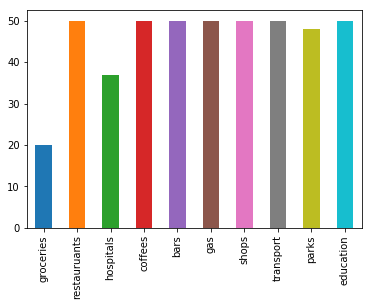

In [36]:
neighborhood_df.count().plot(kind='bar')
plt.title('Facilities within 5 miles of {}'.format(prop1.ADDRESS.values[0]))

# commute

In [65]:
route_service_url = gis.properties.helperServices.route.url
route_service = RouteLayer(route_service_url, gis=gis)

In [38]:
address_work = "CALLE 93B #13-30, BOGOTA, COLOMBIA"

In [41]:
stops = [paddress, address_work]

In [42]:
stops

['CARRERA 21A # 159A-42, BOGOTA, COLOMBIA',
 'CALLE 93B #13-30, BOGOTA, COLOMBIA']

In [43]:
from arcgis.geocoding import geocode, batch_geocode
stops_geocoded = batch_geocode(stops)

stops_geocoded = [item['location'] for item in stops_geocoded]
stops_geocoded2 = '{},{};{},{}'.format(stops_geocoded[0]['x'],stops_geocoded[0]['y'],
                                       stops_geocoded[1]['x'],stops_geocoded[1]['y'])
stops_geocoded2

Token required but not passed in the request.
Token required.


RuntimeError: Token required but not passed in the request.
Token required.
(Error Code: 499)

In [44]:
from arcgis.geocoding import geocode, batch_geocode


In [57]:
stops_geocoded = []
for each in stops:
    temp_fset = geocode(each, as_featureset=True)
    temp = temp_fset.features[0].geometry

    stops_geocoded.append(temp)
    
    


In [58]:
stops_geocoded

[{'x': -74.04648543698433,
  'y': 4.740342726614363,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
 {'x': -74.04931115306711,
  'y': 4.677807551762938,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}]

In [59]:
stops_geocoded2 = '{},{};{},{}'.format(stops_geocoded[0]['x'],stops_geocoded[0]['y'],
                                       stops_geocoded[1]['x'],stops_geocoded[1]['y'])

In [60]:
stops_geocoded2

'-74.04648543698433,4.740342726614363;-74.04931115306711,4.677807551762938'

In [115]:

modes = route_service.retrieve_travel_modes()['supportedTravelModes']
for mode in modes:
    print(mode["id"] + " "+ mode['name'])
    
route_service.retrieve_travel_modes()['defaultTravelMode']

caFAgoThrvUpkFBW Walking Time
Yzk3NjI1NTU5NjVj Rural Driving Distance
FEgifRtFndKNcJMJ Driving Time
iKjmHuBSIqdEfOVr Driving Distance
yFuMFwIYblqKEefX Walking Distance
NmNhNDUwZmE1YTlj Rural Driving Time
ZzzRtYcPLjXFBKwr Trucking Time
UBaNfFWeKcrRVYIo Trucking Distance


'FEgifRtFndKNcJMJ'

In [67]:
route_service.properties.impedance

'TravelTime'

In [83]:
route_service.properties

{
  "currentVersion": 10.7,
  "layerName": "Route_World",
  "layerType": "esriNAServerRouteLayer",
  "impedance": "TravelTime",
  "restrictions": [
    "Avoid Unpaved Roads",
    "Avoid Private Roads",
    "Driving an Automobile",
    "Through Traffic Prohibited",
    "Roads Under Construction Prohibited",
    "Avoid Gates",
    "Avoid Express Lanes",
    "Avoid Carpool Roads"
  ],
  "snapTolerance": 0,
  "maxSnapTolerance": 20000,
  "snapToleranceUnits": "esriMeters",
  "ignoreInvalidLocations": true,
  "restrictUTurns": "esriNFSBAtDeadEndsAndIntersections",
  "accumulateAttributeNames": [
    "Miles",
    "Kilometers"
  ],
  "attributeParameterValues": [
    {
      "attributeName": "Avoid Limited Access Roads",
      "parameterName": "Restriction Usage",
      "parameterType": "float",
      "value": "Avoid_Medium"
    },
    {
      "attributeName": "Avoid Ferries",
      "parameterName": "Restriction Usage",
      "parameterType": "float",
      "value": "Avoid_Medium"
    },
    

# Calculate dates:

For historical records:
    Monday—1/1/1990
    Tuesday—2/1/1990
    Wednesday—3/1/1990
    Thursday—4/1/1990
    Friday—5/1/1990
    Saturday—6/1/1990
    Sunday—7/1/1990

In [79]:
from datetime import datetime
dt_obj = datetime.strptime('2.4.2019 07:30:00,00',
                           '%d.%m.%Y %H:%M:%S,%f')
millisec = dt_obj.timestamp() * 1000
millisec

631283400000.0

In [80]:
route_result = route_service.solve(stops_geocoded2, return_routes=True, 
                             return_stops=True, return_directions=True,
                             impedance_attribute_name='TravelTime',
                             start_time=631283400000,
                             return_barriers=False, return_polygon_barriers=False,
                             return_polyline_barriers=False)

In [72]:
conversion_factor = 0.62137119

In [81]:
route_length = route_result['directions'][0]['summary']['totalLength']
route_duration = route_result['directions'][0]['summary']['totalTime']
route_duration_str = "{}m, {}s".format(int(route_duration), 
                                       round((route_duration %1)*60,2))
print("route length: {} kilometers, route duration: {}".format(round(route_length/conversion_factor,3),
                                                         route_duration_str))

route length: 9.569 kilometers, route duration: 22m, 33.83s


In [70]:
route_features = route_result['routes']['features']
route_fset = FeatureSet(route_features)
stop_features = route_result['stops']['features']
stop_fset = FeatureSet(stop_features)

route_pop_up = {'title':'Name',
               'content':'Total_Miles'}
pdx_map2.draw(route_fset, symbol=route_symbol, popup=route_pop_up)

In [71]:
pdx_map2.draw(stop_fset, symbol=destination_symbol)

# Final Algorithm

In [116]:
startHour = 0
measurementsPerHour = 4

while (startHour<24):
    increment = 60/4
    
    for x in range(0,4):
        dt_obj = datetime.strptime("10.09.2018 {}:{}:00,00".format(int(startHour),int(increment*x)),
                               '%d.%m.%Y %H:%M:%S,%f')
        millisec = dt_obj.timestamp() * 1000
        millisec = int(millisec)
        print("2.1.1990 {}:{}:00,00".format(int(startHour),int(increment*x)) + "->" + str(int(millisec)))
        
        route_result = route_service.solve(stops_geocoded2, return_routes=True, 
                             return_stops=True, return_directions=True,
                             impedance_attribute_name='TravelTime',
                             start_time=millisec,
                             return_barriers=False, return_polygon_barriers=False,
                             return_polyline_barriers=False)
        
        route_length = route_result['directions'][0]['summary']['totalLength']
        route_duration = route_result['directions'][0]['summary']['totalTime']
        route_duration_str = "{}m, {}s".format(int(route_duration), round((route_duration %1)*60,2))
        print("route length: {} kilometers, route duration: {}".format(round(route_length/conversion_factor,3),
                                                         route_duration_str))
        
    startHour += 1


2.1.1990 0:0:00,00->1536555600000
route length: 9.569 kilometers, route duration: 14m, 12.12s
2.1.1990 0:15:00,00->1536556500000
route length: 9.576 kilometers, route duration: 14m, 55.01s
2.1.1990 0:30:00,00->1536557400000
route length: 8.105 kilometers, route duration: 15m, 7.32s
2.1.1990 0:45:00,00->1536558300000
route length: 8.105 kilometers, route duration: 15m, 19.26s
2.1.1990 1:0:00,00->1536559200000
route length: 9.248 kilometers, route duration: 15m, 59.36s
2.1.1990 1:15:00,00->1536560100000
route length: 9.248 kilometers, route duration: 16m, 16.99s
2.1.1990 1:30:00,00->1536561000000
route length: 9.248 kilometers, route duration: 16m, 47.11s
2.1.1990 1:45:00,00->1536561900000
route length: 9.248 kilometers, route duration: 17m, 24.93s
2.1.1990 2:0:00,00->1536562800000
route length: 9.248 kilometers, route duration: 18m, 9.83s
2.1.1990 2:15:00,00->1536563700000
route length: 9.248 kilometers, route duration: 19m, 12.92s
2.1.1990 2:30:00,00->1536564600000
route length: 9.248 

route length: 9.569 kilometers, route duration: 12m, 48.81s
2.1.1990 21:45:00,00->1536633900000
route length: 9.569 kilometers, route duration: 12m, 50.16s
2.1.1990 22:0:00,00->1536634800000
route length: 9.569 kilometers, route duration: 12m, 50.57s
2.1.1990 22:15:00,00->1536635700000
route length: 9.569 kilometers, route duration: 12m, 53.11s
2.1.1990 22:30:00,00->1536636600000
route length: 9.569 kilometers, route duration: 12m, 54.08s
2.1.1990 22:45:00,00->1536637500000
route length: 9.569 kilometers, route duration: 12m, 58.72s
2.1.1990 23:0:00,00->1536638400000
route length: 9.569 kilometers, route duration: 13m, 12.97s
2.1.1990 23:15:00,00->1536639300000
route length: 9.569 kilometers, route duration: 13m, 23.75s
2.1.1990 23:30:00,00->1536640200000
route length: 9.569 kilometers, route duration: 13m, 39.76s
2.1.1990 23:45:00,00->1536641100000
route length: 9.569 kilometers, route duration: 14m, 17.71s


# Finished

However results are obscure...